In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv("pretcarburant.csv")
df

,Benzina,Motorina
0,4.59,4.51
1,4.59,4.51
2,4.55,4.47
3,4.56,4.48
4,4.55,4.46
...,...,...
359,6.26,6.22
360,6.26,6.22
361,6.30,6.27
362,6.33,6.29


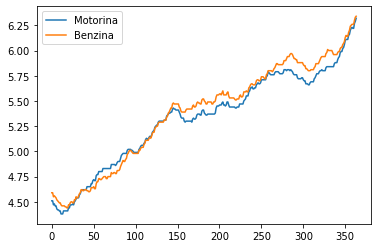

In [4]:
# Plot the price evolution on each fuel
plt.plot(df["Motorina"], label="Motorina")
plt.plot(df["Benzina"], label="Benzina")
plt.legend()
plt.show()

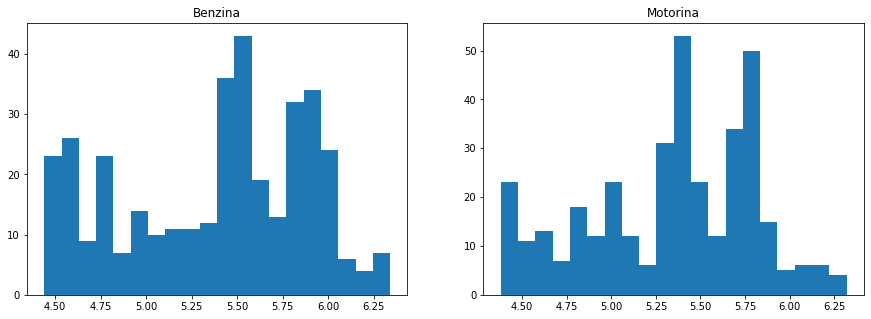

In [5]:
# Plot the histogram using 20 bins. The first array contains the counts, and
# the second array contains the interval bounds
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title("Benzina")
ax[0].hist(df["Benzina"], bins=20)

ax[1].set_title("Motorina")
ax[1].hist(df["Motorina"], bins=20)

plt.show() # To avoid printing any text in the output

In [6]:
# Get numpy data
X_benzina = df["Benzina"].to_numpy()
print(X_benzina.shape)
X_motorina = df["Motorina"].to_numpy()
print(X_motorina.shape)

(364,)
(364,)


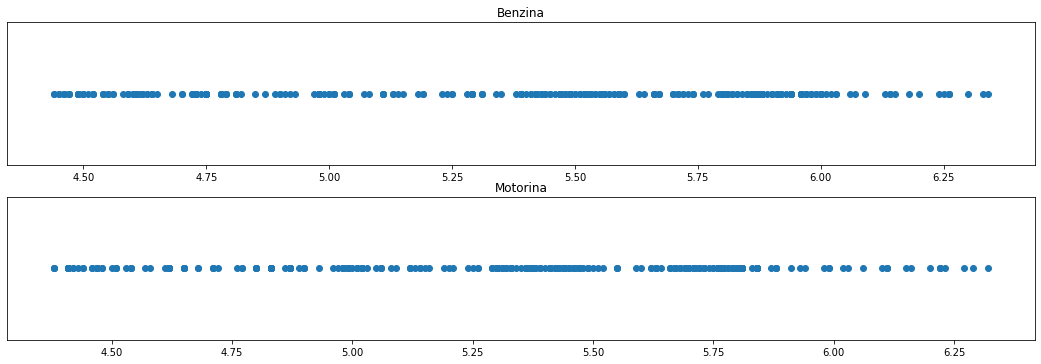

In [7]:
# Scatter plots for each dataset, on only one axis (one-dimensional data)
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
fig.tight_layout()

ax[0].set_title("Benzina")
ax[0].tick_params(axis='y', labelleft=False, left=False)
ax[0].scatter(X_benzina, np.zeros(X_benzina.shape))

ax[1].set_title("Motorina")
ax[1].tick_params(axis='y', labelleft=False, left=False)
ax[1].scatter(X_motorina, np.zeros(X_motorina.shape))

plt.show()

In [8]:
# Create the a GMM with 2 components
gmm_benzina_2 = GaussianMixture(n_components=2, random_state=0)
gmm_motorina_2 = GaussianMixture(n_components=2, random_state=0)

# Fit the data. We need to reshape the input data since it has to be of
# size (n_samples, n_features)
gmm_benzina_2.fit(X_benzina.reshape(-1, 1))
gmm_motorina_2.fit(X_motorina.reshape(-1, 1))

# Print info about the model and its convergence
print("Benzina")
print("Means:\n", gmm_benzina_2.means_)
print("Covariances:\n", gmm_benzina_2.covariances_)
print("Converged:", gmm_benzina_2.converged_)
print("Lower bound on the log-likelihood:", gmm_benzina_2.lower_bound_)

print("-" * 10)

print("Motorina")
print("Means:\n", gmm_motorina_2.means_)
print("Covariances:\n", gmm_motorina_2.covariances_)
print("Converged:", gmm_motorina_2.converged_)
print("Lower bound on the log-likelihood:", gmm_motorina_2.lower_bound_)

Benzina
Means:
 [[5.66840651]
 [4.71826866]]
Covariances:
 [[[0.07953269]]

 [[0.03902061]]]
Converged: True
Lower bound on the log-likelihood: -0.5938193123238035
----------
Motorina
Means:
 [[4.74426691]
 [5.57920938]]
Covariances:
 [[[0.06174051]]

 [[0.07907239]]]
Converged: True
Lower bound on the log-likelihood: -0.5903988397077925


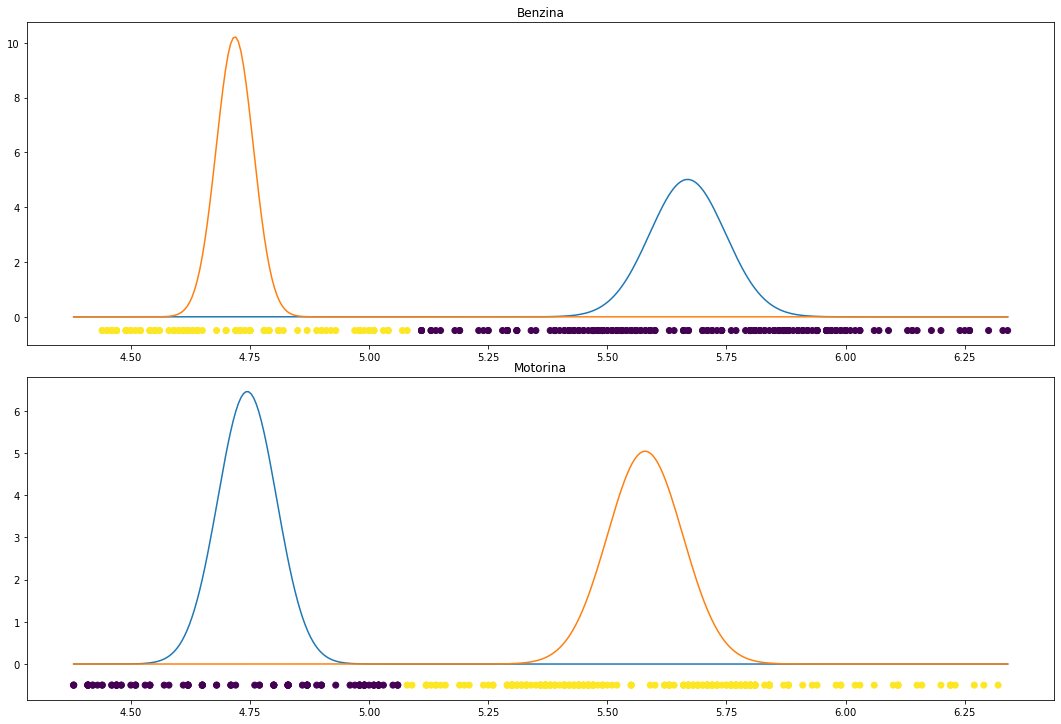

In [9]:
# Compute the mixture membership (hard assignments). For soft assignments,
# use predict_probs(), and use as colours the second column.
components_benzina = gmm_benzina_2.predict(X_benzina.reshape(-1, 1))
components_motorina = gmm_motorina_2.predict(X_motorina.reshape(-1, 1))

# Generate the x-values on which we plot the mixtures
x = np.linspace(df.min().min(), df.max().max(), len(df))

# Compute the points for each gaussian
gaussians_benzina_2 = []
gaussians_motorina_2 = []
for i in range(gmm_benzina_2.n_components):
    gaussians_benzina_2.append(
        stats.norm.pdf(
            x,
            gmm_benzina_2.means_[i],
            gmm_benzina_2.covariances_[i]
        ).reshape(-1)
    )

    gaussians_motorina_2.append(
        stats.norm.pdf(
            x,
            gmm_motorina_2.means_[i],
            gmm_motorina_2.covariances_[i]
        ).reshape(-1)
    )

# Plot
displacement = 0.5  # For nice plots
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
fig.tight_layout()

ax[0].set_title("Benzina")
ax[0].scatter(X_benzina, np.zeros(X_benzina.shape) - displacement, c=components_benzina)
for i in range(gmm_benzina_2.n_components):
    ax[0].plot(x, gaussians_benzina_2[i])

ax[1].set_title("Motorina")
ax[1].scatter(X_motorina, np.zeros(X_motorina.shape) - displacement, c=components_motorina)
for i in range(gmm_motorina_2.n_components):
    ax[1].plot(x, gaussians_motorina_2[i])

plt.show()

In [10]:
# Create the a GMM with 3 components
gmm_benzina_3 = GaussianMixture(n_components=3, random_state=0)
gmm_motorina_3 = GaussianMixture(n_components=3, random_state=0)

# Fit the data. We need to reshape the input data since it has to be of
# size (n_samples, n_features)
gmm_benzina_3.fit(X_benzina.reshape(-1, 1))
gmm_motorina_3.fit(X_motorina.reshape(-1, 1))

# Print info about the model and its convergence
print("Benzina")
print("Means:\n", gmm_benzina_3.means_)
print("Covariances:\n", gmm_benzina_3.covariances_)
print("Converged:", gmm_benzina_3.converged_)
print("Lower bound on the log-likelihood:", gmm_benzina_3.lower_bound_)

print("-" * 10)

print("Motorina")
print("Means:\n", gmm_motorina_3.means_)
print("Covariances:\n", gmm_motorina_3.covariances_)
print("Converged:", gmm_motorina_3.converged_)
print("Lower bound on the log-likelihood:", gmm_motorina_3.lower_bound_)

Benzina
Means:
 [[5.47927981]
 [4.76838603]
 [5.90144887]]
Covariances:
 [[[0.01012023]]

 [[0.05381108]]

 [[0.0257854 ]]]
Converged: True
Lower bound on the log-likelihood: -0.5567172982448158
----------
Motorina
Means:
 [[5.37914705]
 [5.77962321]
 [4.79431655]]
Covariances:
 [[[0.00428693]]

 [[0.03488609]]

 [[0.06913735]]]
Converged: True
Lower bound on the log-likelihood: -0.5251991395728022


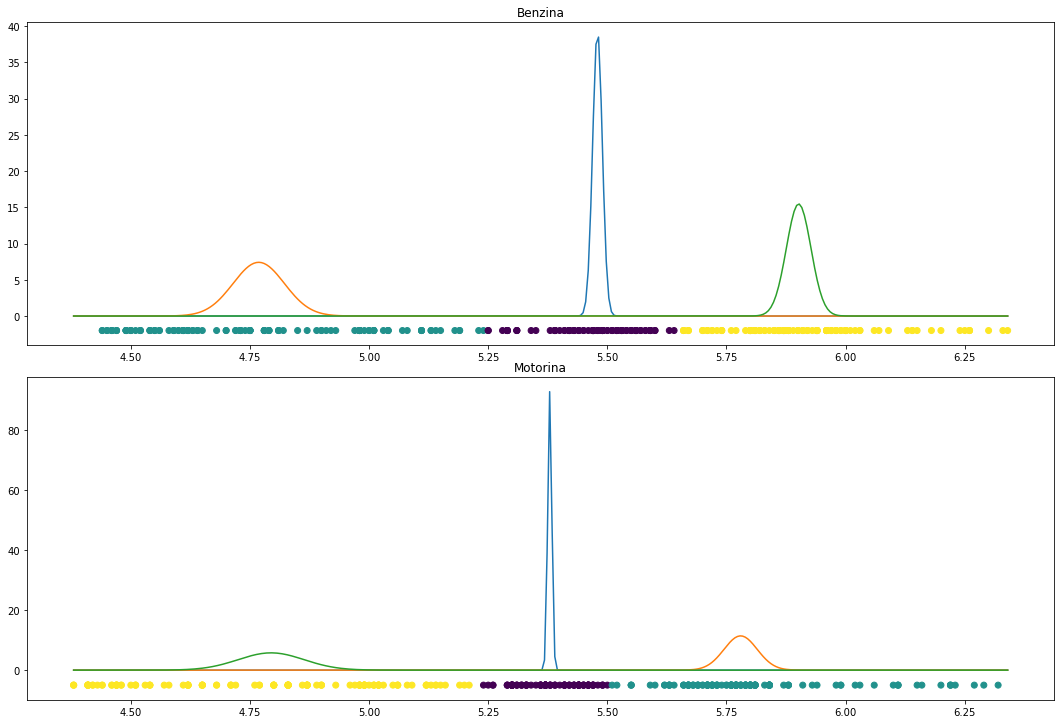

In [11]:
# Compute the mixture membership (hard assignments). For soft assignments,
# use predict_probs(), and use as colours the second column.
components_benzina = gmm_benzina_3.predict(X_benzina.reshape(-1, 1))
components_motorina = gmm_motorina_3.predict(X_motorina.reshape(-1, 1))

# Generate the x-values on which we plot the mixtures
x = np.linspace(df.min().min(), df.max().max(), len(df))

# Compute the points for each gaussian
gaussians_benzina_3 = []
gaussians_motorina_3 = []
for i in range(gmm_benzina_3.n_components):
    gaussians_benzina_3.append(
        stats.norm.pdf(
            x,
            gmm_benzina_3.means_[i],
            gmm_benzina_3.covariances_[i]
        ).reshape(-1)
    )

    gaussians_motorina_3.append(
        stats.norm.pdf(
            x,
            gmm_motorina_3.means_[i],
            gmm_motorina_3.covariances_[i]
        ).reshape(-1)
    )

# Plot
displacement1 = 2  # For nice plots
displacement2 = 5  # For nice plots
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
fig.tight_layout()

ax[0].set_title("Benzina")
ax[0].scatter(X_benzina, np.zeros(X_benzina.shape) - displacement1, c=components_benzina)
for i in range(gmm_benzina_3.n_components):
    ax[0].plot(x, gaussians_benzina_3[i])

ax[1].set_title("Motorina")
ax[1].scatter(X_motorina, np.zeros(X_motorina.shape) - displacement2, c=components_motorina)
for i in range(gmm_motorina_3.n_components):
    ax[1].plot(x, gaussians_motorina_3[i])

plt.show()

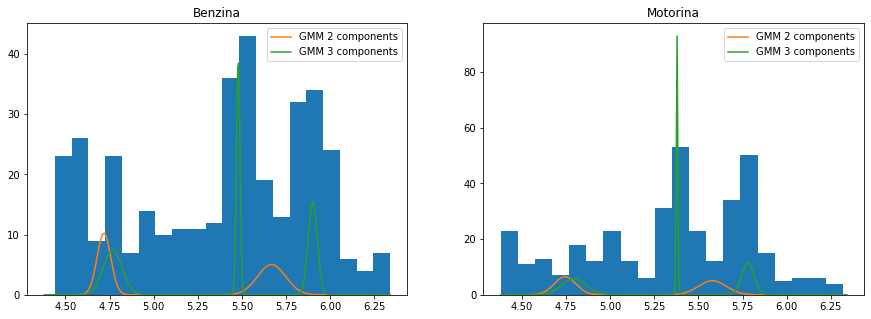

In [13]:
# Combine the gaussians to form the mixture models, and compare the graphs
mixture_benzina_2 = sum(gaussians_benzina_2)
mixture_benzina_3 = sum(gaussians_benzina_3)
mixture_motorina_2 = sum(gaussians_motorina_2)
mixture_motorina_3 = sum(gaussians_motorina_3)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title("Benzina")
ax[0].hist(X_benzina, bins=20)
ax[0].plot(x, mixture_benzina_2, label='GMM 2 components')
ax[0].plot(x, mixture_benzina_3, label='GMM 3 components')
ax[0].legend()

ax[1].set_title("Motorina")
ax[1].hist(X_motorina, bins=20)
ax[1].plot(x, mixture_motorina_2, label='GMM 2 components')
ax[1].plot(x, mixture_motorina_3, label='GMM 3 components')
ax[1].legend()

plt.show()

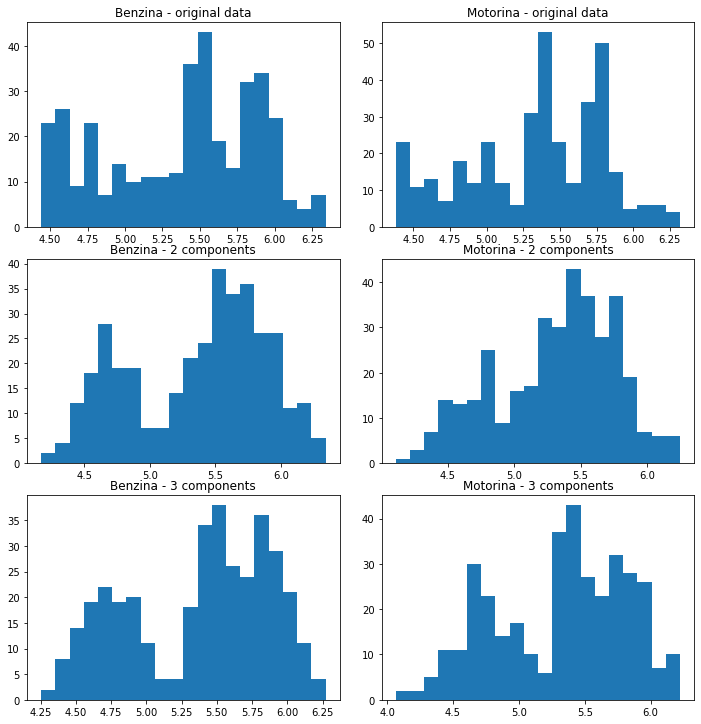

In [14]:
# Sample data from the GMM models
cfd_mixture_benzina_2 = gmm_benzina_2.sample(len(X_benzina))[0].reshape(-1)
cfd_mixture_benzina_3 = gmm_benzina_3.sample(len(X_benzina))[0].reshape(-1)
cfd_mixture_motorina_2 = gmm_motorina_2.sample(len(X_motorina))[0].reshape(-1)
cfd_mixture_motorina_3 = gmm_motorina_3.sample(len(X_motorina))[0].reshape(-1)

# Plot the data distributions
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
fig.tight_layout()

ax[0, 0].set_title("Benzina - original data")
ax[0, 0].hist(X_benzina, bins=20)
ax[1, 0].set_title("Benzina - 2 components")
ax[1, 0].hist(cfd_mixture_benzina_2, bins=20)
ax[2, 0].set_title("Benzina - 3 components")
ax[2, 0].hist(cfd_mixture_benzina_3, bins=20)

ax[0, 1].set_title("Motorina - original data")
ax[0, 1].hist(X_motorina, bins=20)
ax[1, 1].set_title("Motorina - 2 components")
ax[1, 1].hist(cfd_mixture_motorina_2, bins=20)
ax[2, 1].set_title("Motorina - 3 components")
ax[2, 1].hist(cfd_mixture_motorina_3, bins=20)

plt.show()

In [15]:
# Perform the KS test and check which model fits the data better
print("Benzina")
print("GMM 2 components:", stats.kstest(X_benzina, cfd_mixture_benzina_2))
print("GMM 3 components:", stats.kstest(X_benzina, cfd_mixture_benzina_3))

print()

print("Motorina")
print("GMM 2 components:", stats.kstest(X_motorina, cfd_mixture_motorina_2))
print("GMM 3 components:", stats.kstest(X_motorina, cfd_mixture_motorina_3))

Benzina
GMM 2 components: KstestResult(statistic=0.07417582417582418, pvalue=0.2695238346486358)
GMM 3 components: KstestResult(statistic=0.04945054945054945, pvalue=0.765777399183522)

Motorina
GMM 2 components: KstestResult(statistic=0.07967032967032966, pvalue=0.19839154548953863)
GMM 3 components: KstestResult(statistic=0.08791208791208792, pvalue=0.12003092984770761)
